# data preparation

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

#!jupyter nbconvert --to script "01 Data Preparation.ipynb"

In [24]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cd household_power_consumption/

C:\Users\danie\Documents\GitHub\data-science-portfolio\01 LSTM\household_power_consumption


In [4]:
data1 = pd.read_csv('household_power_consumption.txt', sep= ";", low_memory= False, parse_dates={'datetime':[0,1]}, index_col=['datetime'], na_values= '?', keep_default_na= True)
data1

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [5]:
data = data1.copy()

In [6]:
# Prüfen der Datentypen
data.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [7]:
# Prüfen der Daten auf Vollständigkeit
data.isna().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [8]:
# Fehlende Daten mit den Daten aus dem Vortag ergänzen
def fill_missing(df):
    one_day = 60 * 24
    
    for row in range(df.values.shape[0]):
        for col in range(df.values.shape[1]):
            if np.isnan(df.values[row, col]):
                df.values[row, col] = df.values[row - one_day, col]

In [9]:
fill_missing(data)

In [10]:
data.isna().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [11]:
# Neue Spalte mit dem übrigen Stromverbrauchern
data['sub_metering_4'] = (data.values[:,0] * 1000 / 60) - (data.values[:,4] + data.values[:,5] + data.values[:,6])

In [12]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,15.766667
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,15.733333
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,15.633333


In [14]:
def lineplot(df):
    columns = df.columns
    for x in columns:
        plt.figure(figsize=(40,12))
        sns.lineplot( x = "datetime",
                     y = x,
                     data = df)
        plt.title(x, color= 'white', size= 18)
        plt.ylabel(x, color= 'white', size= 16)
        plt.xlabel('Time', color= 'white', size= 16)
        plt.tick_params(axis='x', colors='white')
        plt.tick_params(axis='y', colors='white')
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.ticklabel_format(style = 'plain', axis = 'y')

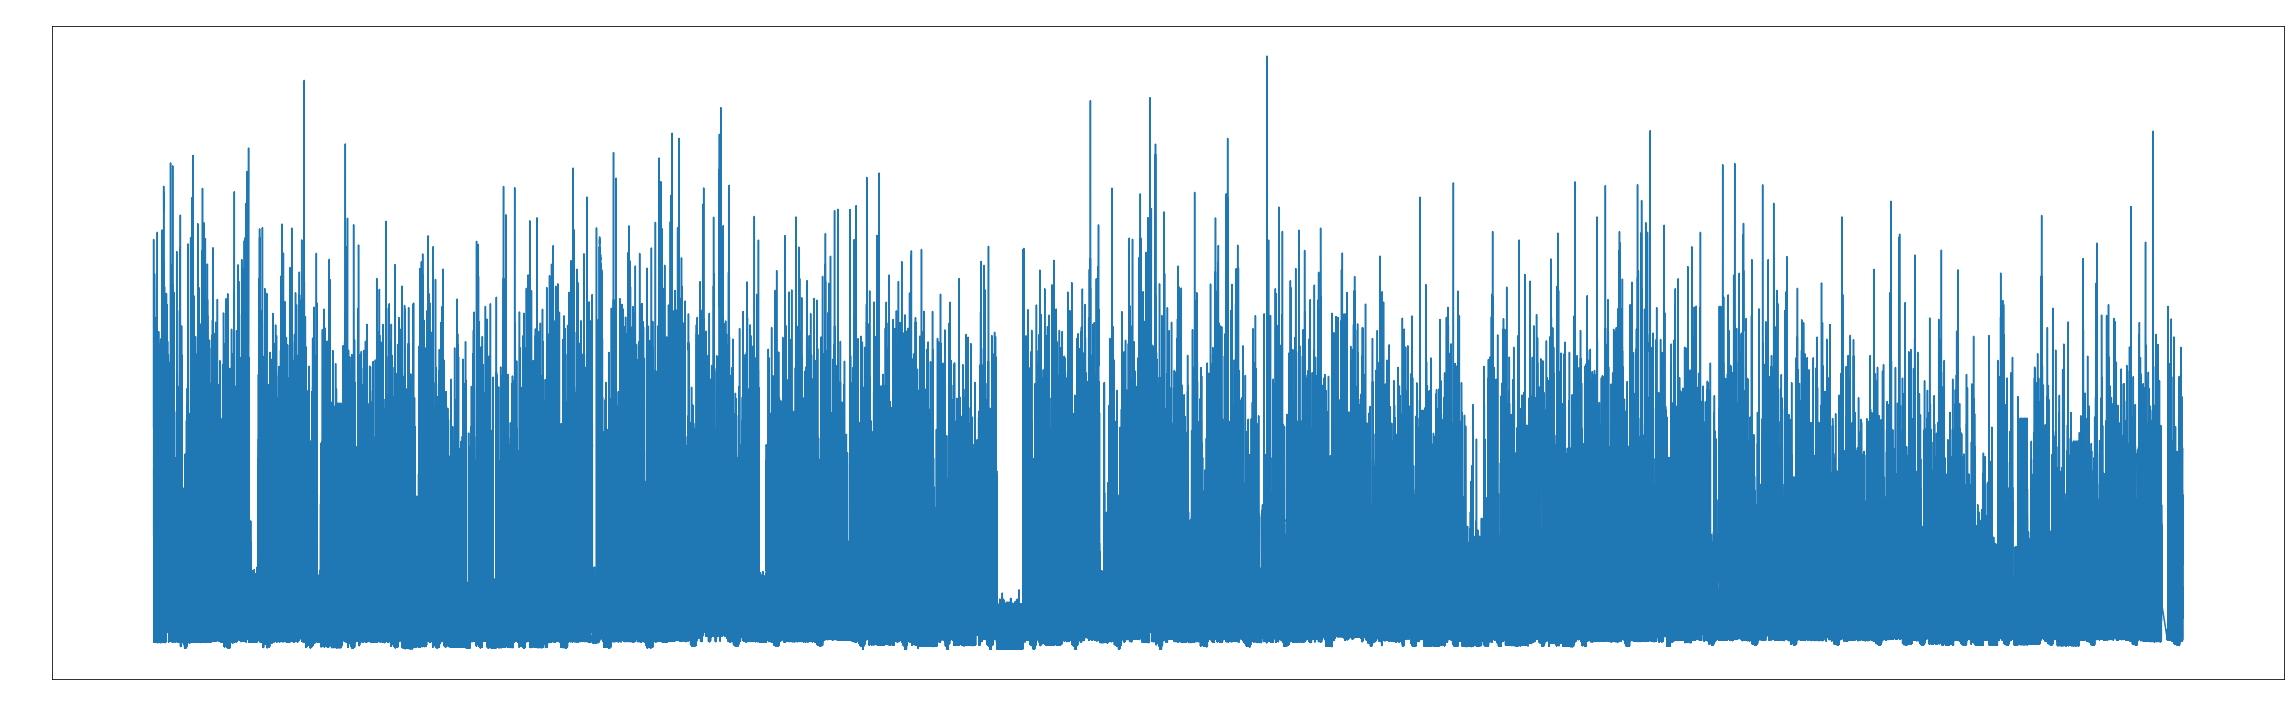

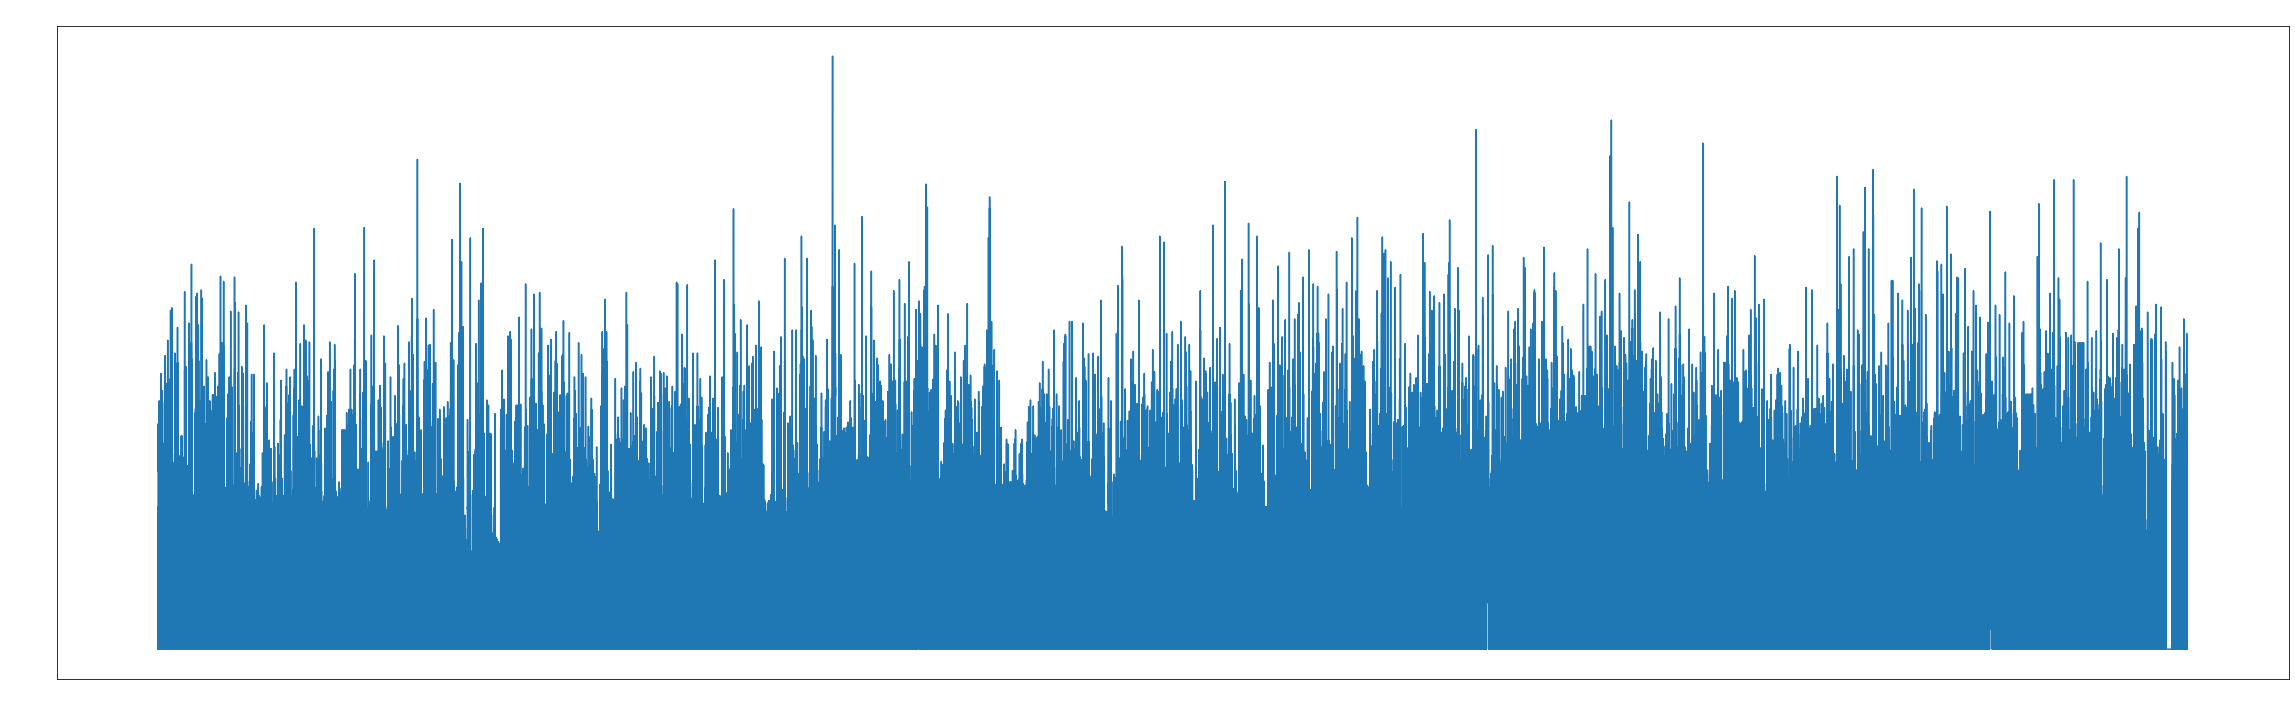

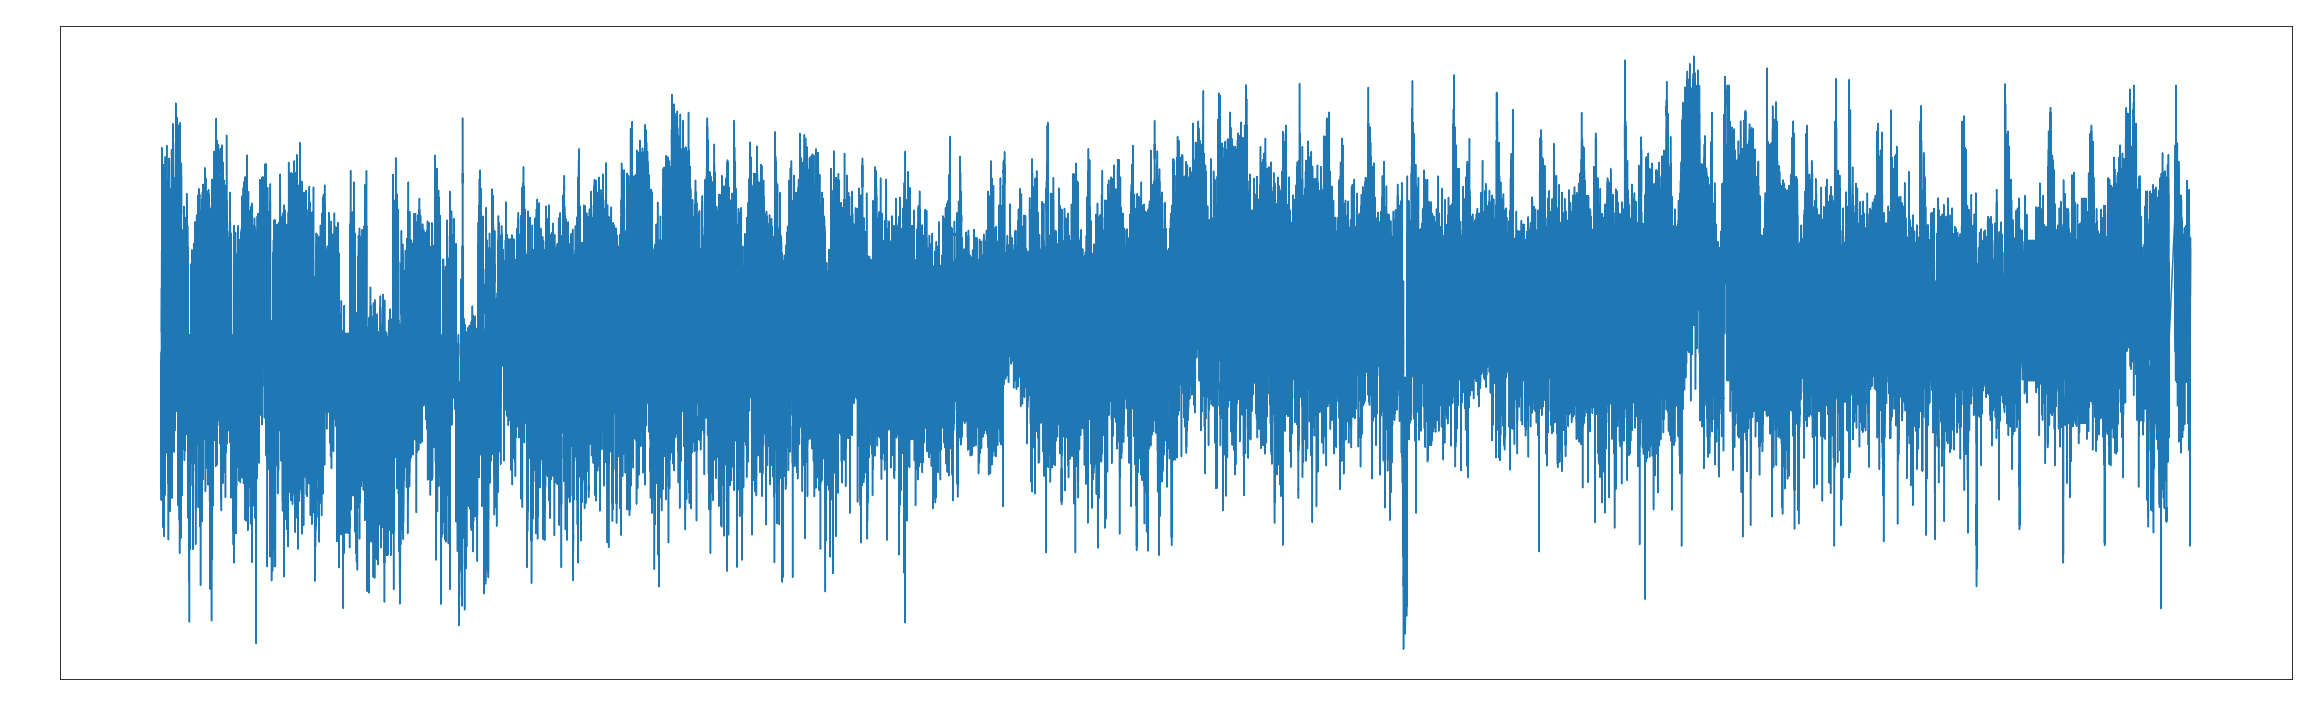

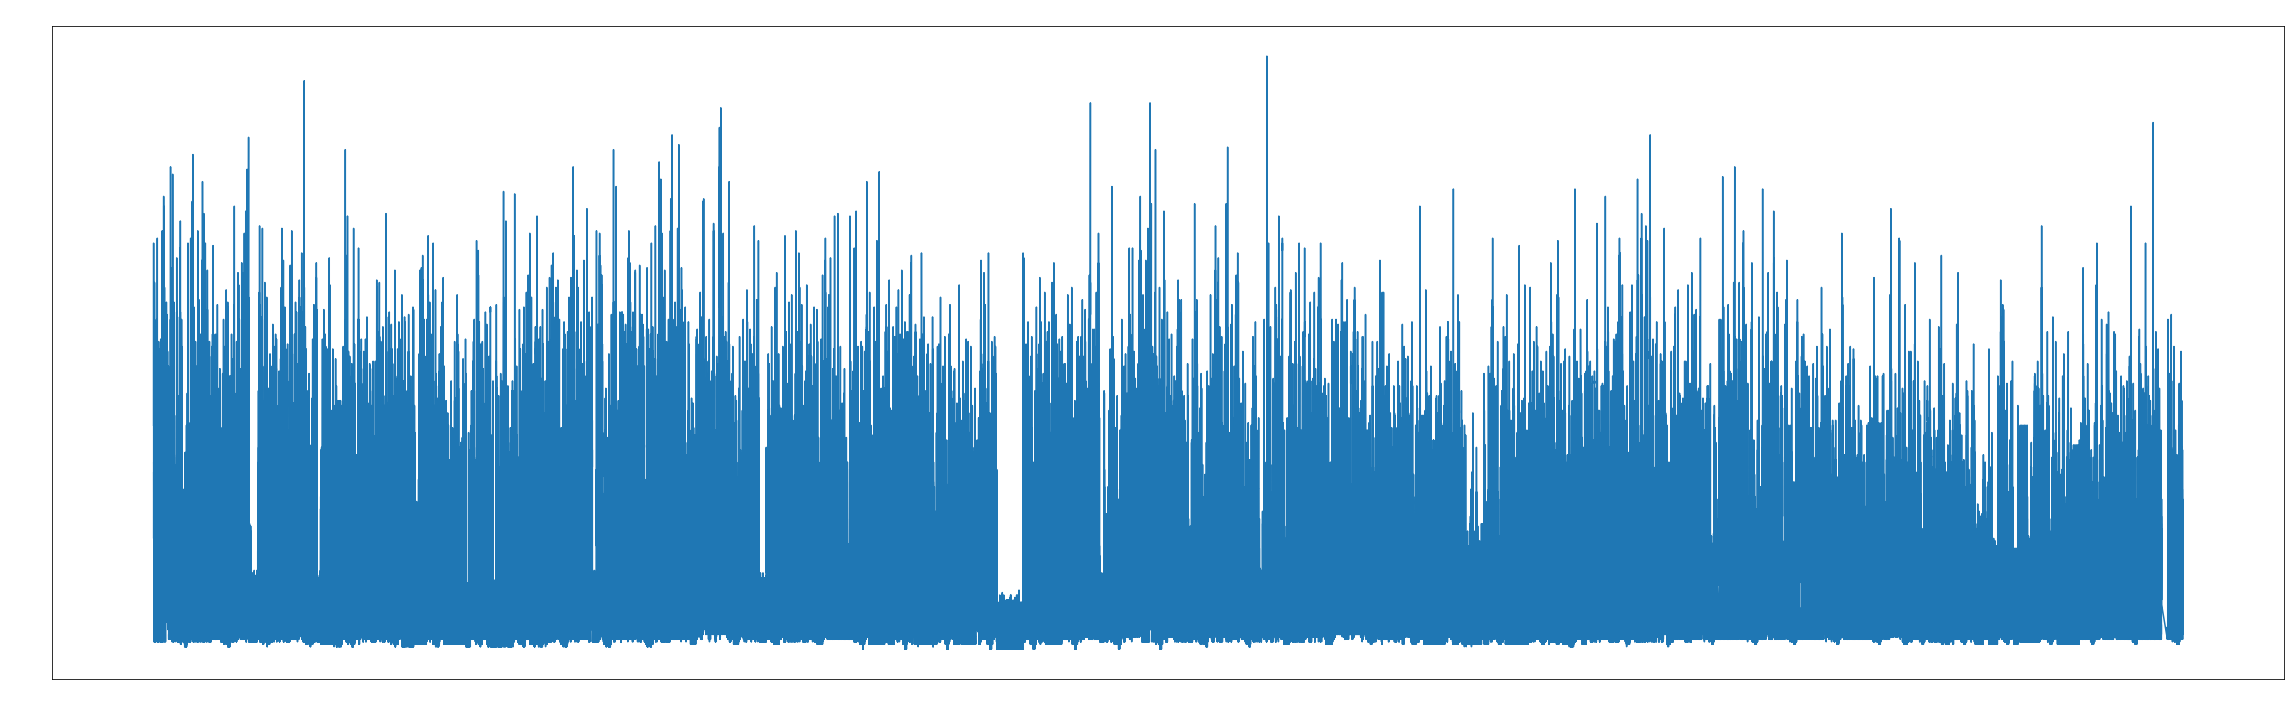

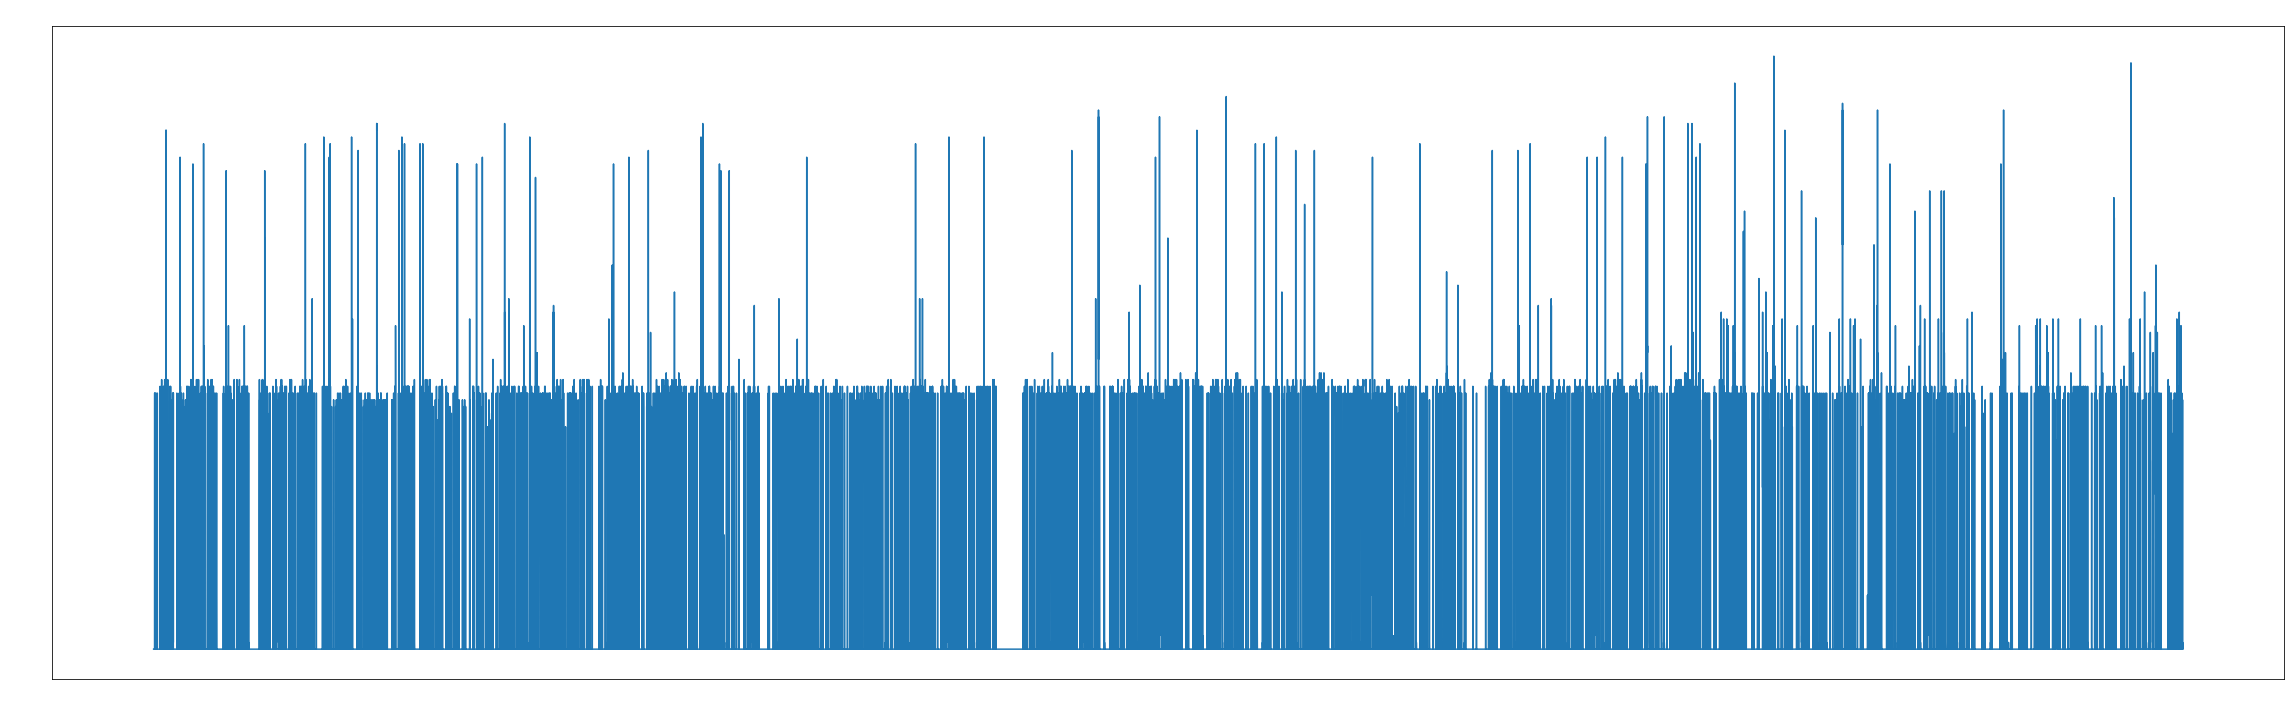

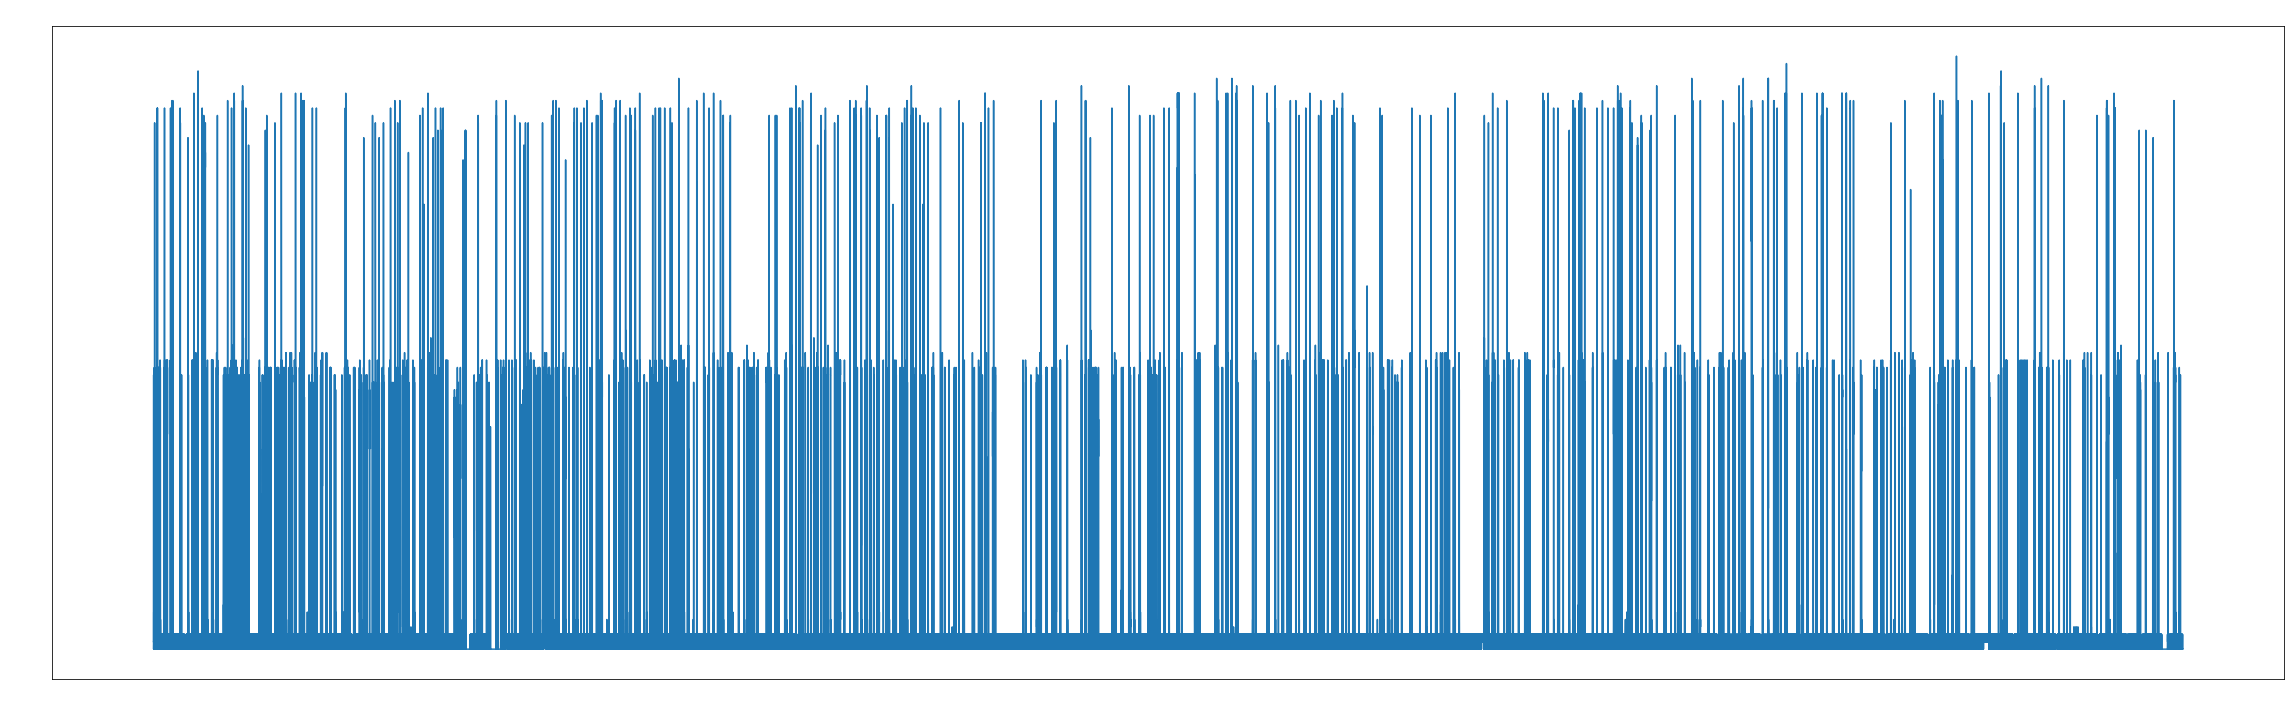

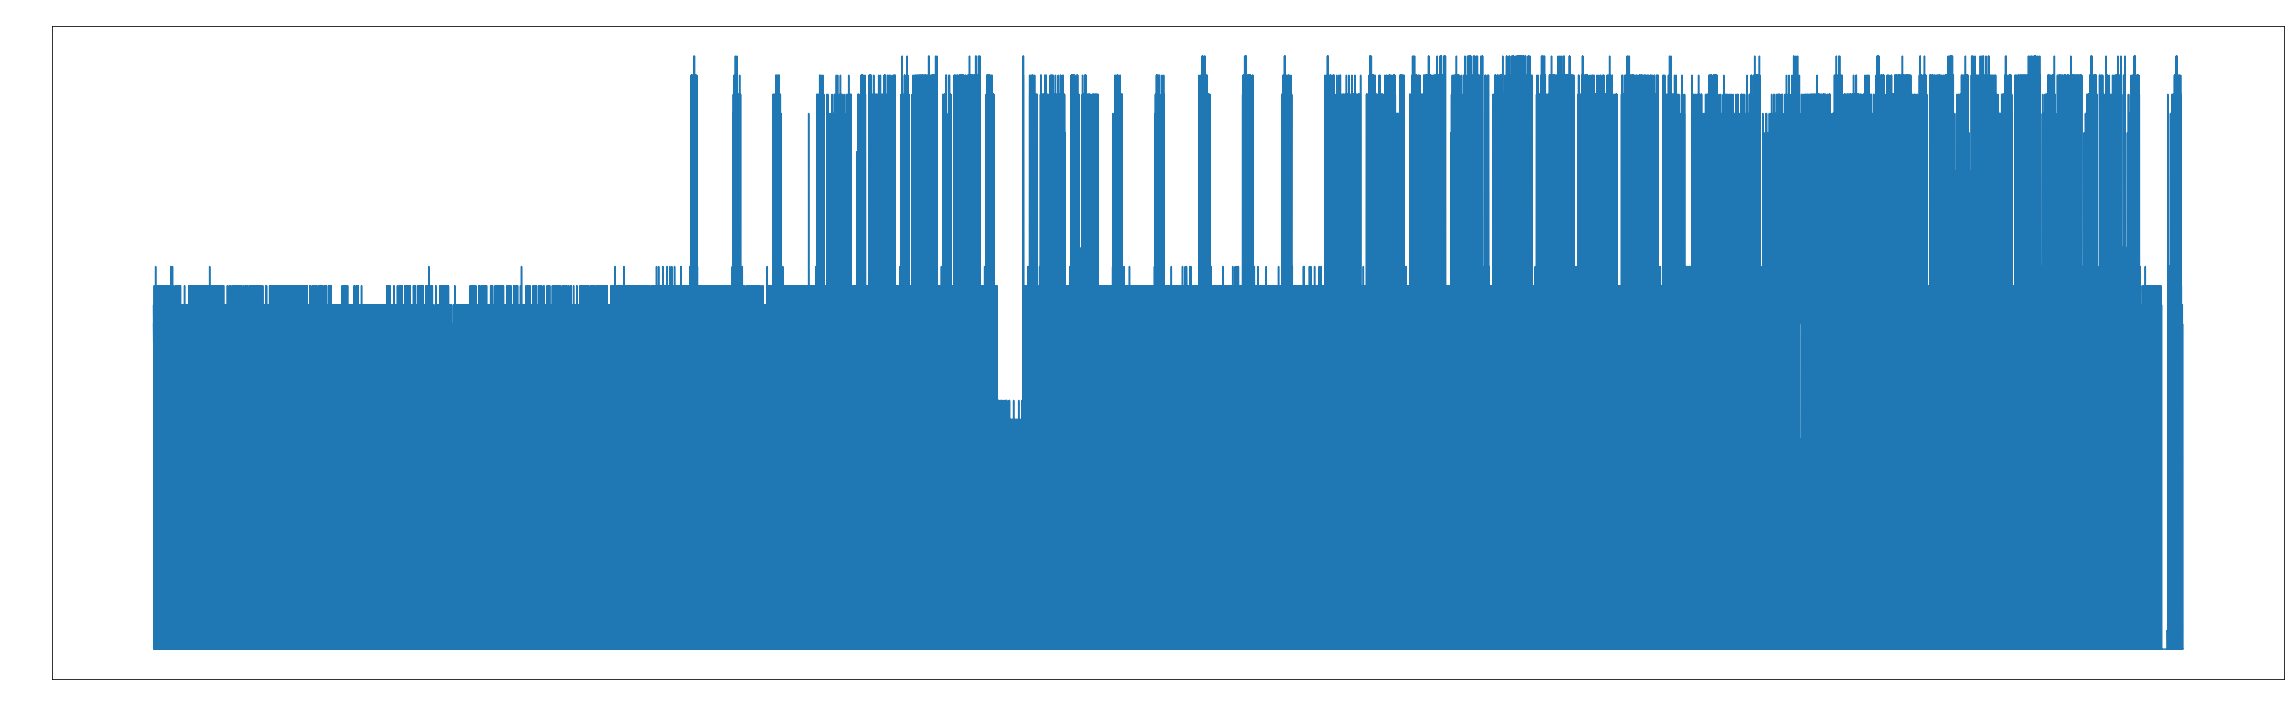

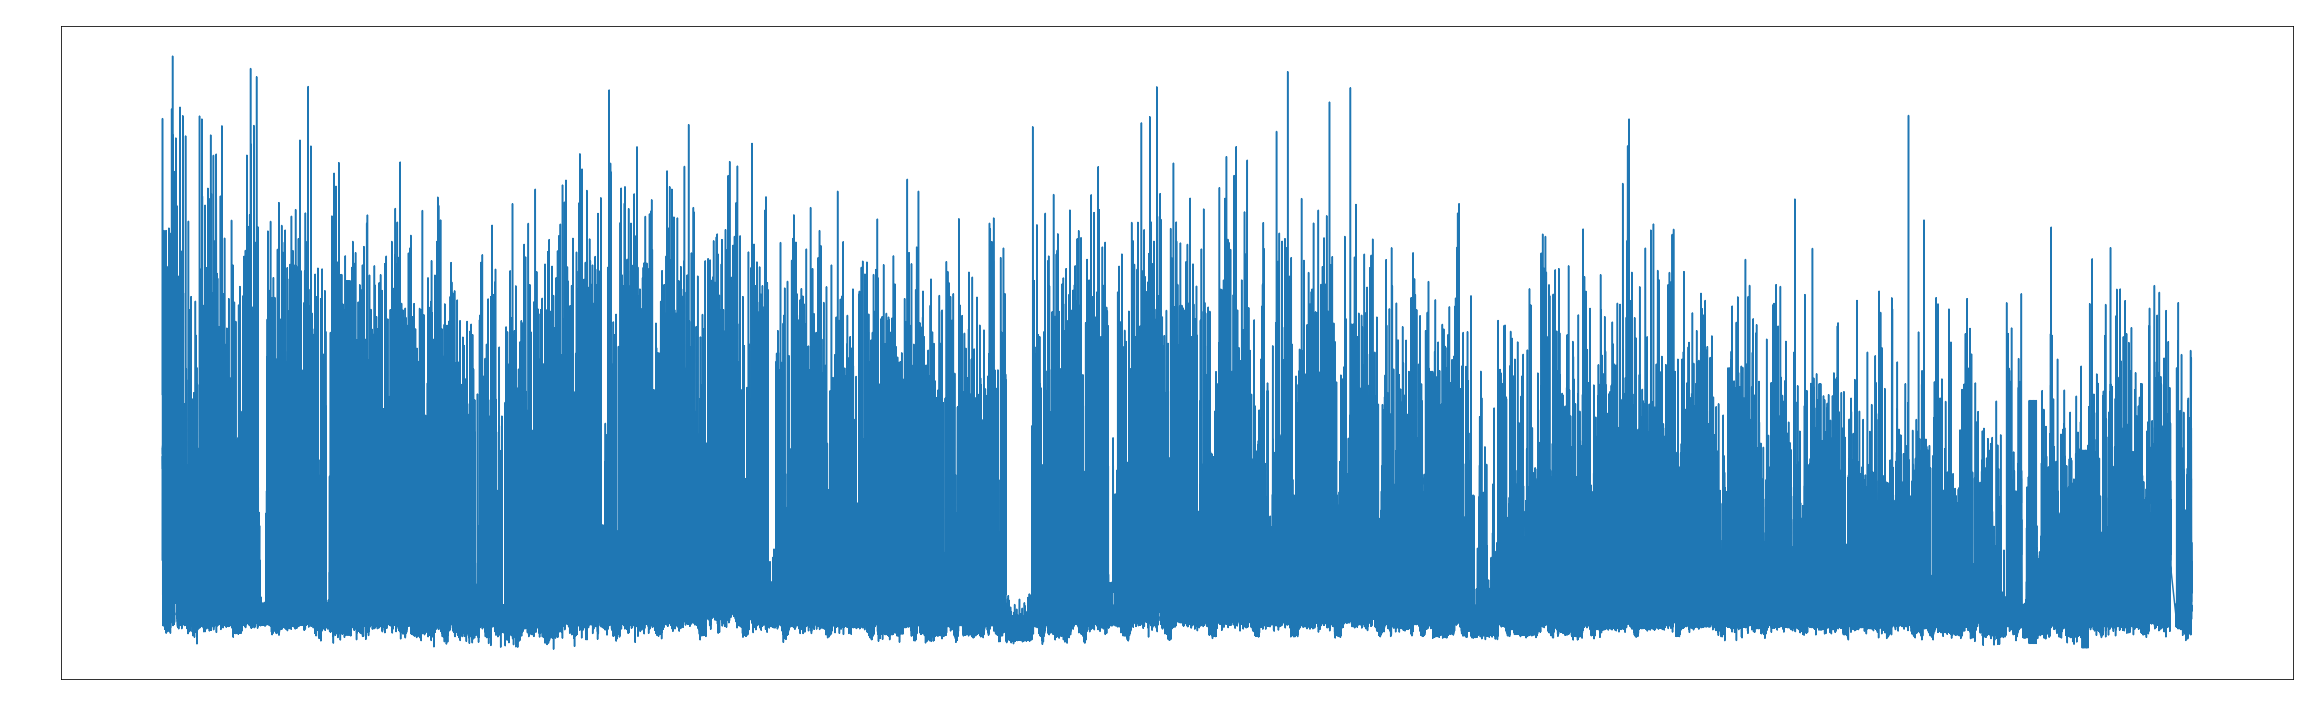

In [134]:
lineplot(data)

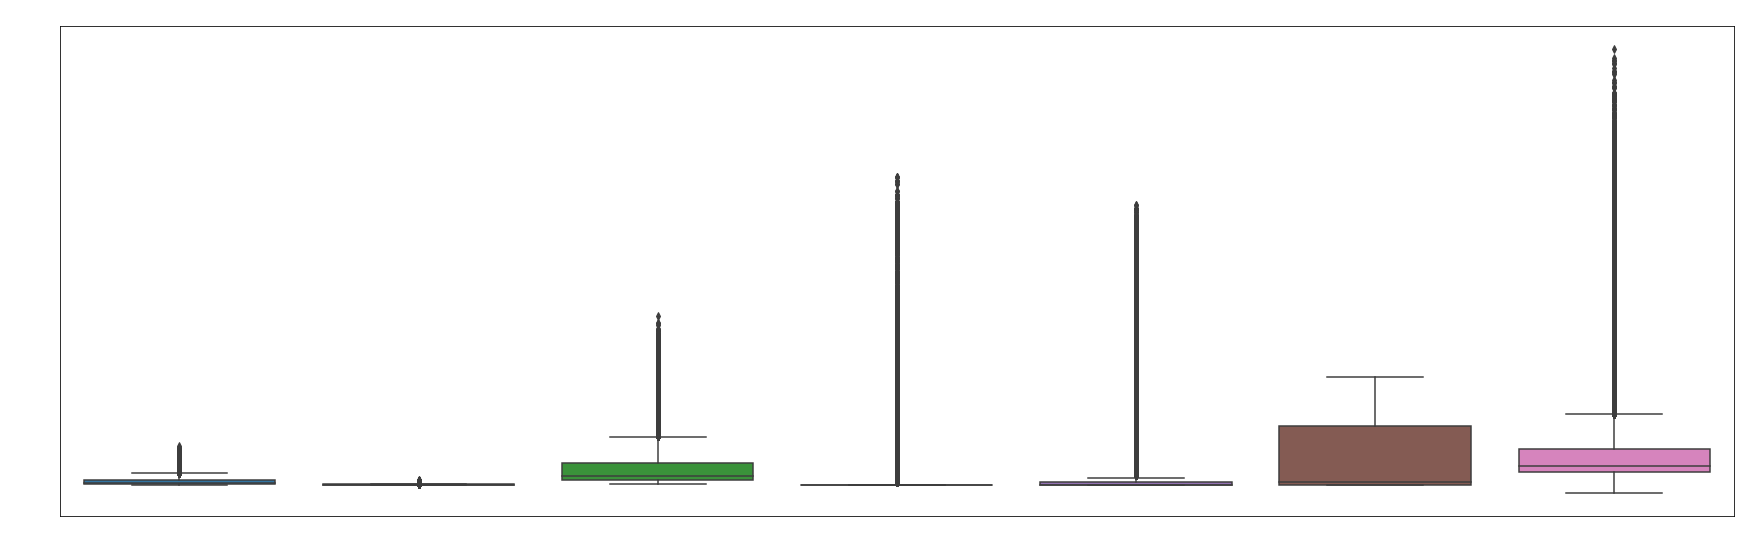

In [21]:
# Boxplot zur Darstellung der Verteilung und Ausreissern

plt.figure(figsize=(30,9))
sns.boxplot(x= 'variable',
            y= 'value',
            data= pd.melt(data, id_vars=['Voltage']))
plt.title('Boxplot', color= 'white', size= 18)
plt.ylabel('Value', color= 'white', size= 16)
plt.xlabel('', color= 'white', size= 16)
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

In [23]:
# Zusätlich werden zu den Daten die Feiertage hinzugefügt
us_holiday

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   sub_metering_4         float64
dtypes: float64(8)
memory usage: 142.5 MB


In [25]:
data.to_csv('household_power_consumption.csv')